In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from config import api_key

from census import Census
from us import states

In [2]:
# what is going on?

## Defining three functions:
* census_data(year): return census data of that year.
* vote_data(year): return vote data of that year.
* get_dataset(year): merge census and vote data, clean and format them.
* Example usage: data_2016 = get_dataset(2016)

In [3]:
# census_api() function, returning the census data of a given year.
def census_data(YEAR):
    c = Census(api_key, year=YEAR)
    raw_data = c.acs5.get(('NAME', 'B19013_001E', 'B19301_001E', 'B23025_003E',
                       'B23025_004E', 'B23025_005E', 'B01003_001E', "B01002_001E", "B17001_002E",'B01002_002E','B01002_003E',
                          'B02001_002E', 'B02001_003E', 'B02001_005E','B03001_003E','B02001_004E','B25035_001E'), {'for':'state:*'})
    census_df_raw = pd.DataFrame(raw_data)
    census_df_raw = census_df_raw.rename(columns = {'state': 'State#',
                          'NAME': 'State', 
                          'B01003_001E':'Total_population',
                          'B23025_003E':'Employable_civilians',
                          'B23025_004E':'Employed_civilians', 
                          'B23025_005E':'Unemployed_civilians', 
                          'B19013_001E':'Income_median',
                          'B19301_001E':'Income_per_capita',
                          "B01002_001E":'median age',
                          "B17001_002E":'Poverty_count',
                          'B01002_002E':'median_male_age',
                          'B01002_003E':'median_female_age',
                          'B02001_002E':'population_white_alone',
                          'B02001_003E':'population_black_alone',
                          'B02001_005E':'population_asian_alone',
                          'B03001_003E':'population_hispanic_origin',
                          'B02001_004E':'population_american_indian_alone',
                          'B25035_001E':'median_house_construction_year'                                                             
    })
    census_df_raw = census_df_raw.sort_values('State#').reset_index(drop=True)
    # reformatting census data
    census_df = census_df_raw.loc[:,['State', 'Total_population', 'Income_median', 'Income_per_capita','median_male_age','median_female_age',
                                    'population_white_alone','population_black_alone', 'population_asian_alone','population_hispanic_origin',
                                    'population_american_indian_alone', 'median_house_construction_year']]
    census_df['Poverty_rate'] = census_df_raw.Poverty_count/census_df_raw.Total_population
    census_df['Unemployment_rate'] = census_df_raw.Unemployed_civilians/census_df_raw.Employable_civilians
    state_df = pd.read_csv('Resources/state_centroids.csv')
    census_df = pd.merge(census_df, state_df, on = 'State')
    census_df = census_df.set_index('State')
    return census_df

In [4]:
def vote_data(YEAR):
    demo_raw = vote_df.loc[(vote_df.year == YEAR)&(vote_df.party == 'democrat'), ['state', 'candidatevotes']]
    demo = demo_raw.groupby('state')['candidatevotes'].sum()
    rep_raw = vote_df.loc[(vote_df.year == YEAR)&(vote_df.party == 'republican'),['state', 'candidatevotes']]
    rep = rep_raw.groupby('state')['candidatevotes'].sum()
    total = vote_df.loc[(vote_df.year == YEAR), ['state', 'totalvotes']].groupby('state').mean()['totalvotes'] 
    vote_df_year = pd.concat([demo, rep, total],axis=1)
    vote_df_year.columns = [str(YEAR)+'_democrat_votes', str(YEAR)+'_republican_votes', str(YEAR)+'_total_votes']
    return vote_df_year

In [5]:
# Merging data for a given year. The function takes 3 arguments: dataframe1, dataframe2, year
def get_dataset(YEAR):
    dataset = census_data(YEAR).merge(vote_data(YEAR), left_index=True, right_index=True)
    dataset['votes difference'] = dataset[str(YEAR)+'_democrat_votes'] - dataset[str(YEAR)+'_republican_votes']
    dataset.loc[dataset['votes difference']<0, 'winner'] = 'Republican'
    dataset.loc[dataset['votes difference']>0, 'winner'] = 'Democrat'
    return dataset

In [ ]:
#TK Code

In [ ]:
print ("I made changes to the file")
print("Added new print stmt")
print("last stmt")

In [ ]:
#TK code ends

In [ ]:
#Adam code is awesome

In [ ]:
c = Census(api_key, year=2016)
raw_data = c.acs5.get(('NAME', 'B19013_001E', 'B19301_001E', 'B23025_003E',
                       'B23025_004E', 'B23025_005E', 'B01003_001E', "B01002_001E"), {'for':'state:*'})
census_df = pd.DataFrame(raw_data)
census_df = census_df.rename(columns = {'state': 'State#',
                          'NAME': 'State', 
                          'B01003_001E':'Total_population',
                          'B23025_003E':'Employable_civilians',
                          'B23025_004E':'Employed_civilians', 
                          'B23025_005E':'Unemployed_civilians', 
                          'B19013_001E':'Income',
                          'B19301_001E':'Income_per_capita',
                          "B01002_001E":'median age'
                          
    
})
census_df = census_df.sort_values('State#').reset_index(drop=True)
census_df.head()

In [ ]:
#Presidential file to dataframe called df
file = "Resources/1976-2016-president.tab"
df = pd.read_csv(file,sep='\t',header=(0))
#df.tail(40)

In [ ]:
party = df.groupby("party")
party = party["candidatevotes"].sum()
party = pd.DataFrame(party.sort_values(ascending=False))
#party.head(40)

In [ ]:
party_state = df.groupby(["party", "state"])
#party_state.sum()

In [ ]:
#list just republican/democrat
parties = list(df["party"].unique())
parties
#would consider conservative, republican, and liberal party democrat. need to combine. 
combined_dem_rep = df.replace("conservative","republican")
combined_dem_rep = combined_dem_rep.replace("liberal party", "democrat")
combined_dem_rep = combined_dem_rep.replace("democratic-farmer-labor","democrat")
dems = combined_dem_rep.loc[combined_dem_rep["party"] == "democrat"]
repubs = combined_dem_rep.loc[combined_dem_rep["party"] == "republican"]
dems_repubs = dems.append(repubs)
state_count = dems_repubs.groupby(["party", "state"])
state_count = pd.DataFrame(state_count[["candidatevotes", "totalvotes"]].sum())
#state_count

In [ ]:
dem_votes_by_state = dems[["state","candidatevotes","totalvotes"]]
dem_votes_by_state = dem_votes_by_state.groupby("state")
dem_votes_by_state = dem_votes_by_state.sum()
len(dem_votes_by_state)

repubs_votes_by_state = repubs[["state","candidatevotes","totalvotes"]]
repubs_votes_by_state = repubs_votes_by_state.groupby("state")
repubs_votes_by_state = repubs_votes_by_state.sum()
#repubs_votes_by_state

dems_merged_repubs = pd.merge(dem_votes_by_state, repubs_votes_by_state, on="state", how="outer")
dems_merged_repubs = dems_merged_repubs.rename(columns = {"candidatevotes_x":"democrat votes",
                                                         "candidatevotes_y": "republican votes"})
dems_merged_repubs = dems_merged_repubs[['democrat votes', 'republican votes']]
dems_merged_repubs["Difference%ofTotal"] = (dems_merged_repubs["democrat votes"] - dems_merged_repubs["republican votes"])/(dems_merged_repubs["democrat votes"]+dems_merged_repubs["republican votes"])
dems_merged_repubs = dems_merged_repubs.sort_values("Difference%ofTotal", ascending=False)
#dems_merged_repubs



In [ ]:
plots = list(dems_merged_repubs["Difference%ofTotal"])
x_axis = list(dems_merged_repubs.index)
colors = ["blue",
          "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",]
plt.bar(x_axis, plots, color=colors, alpha=0.5, align="center")
plt.tight_layout()
plt.xlabel("States")
plt.ylabel("democrat - republican votes / total votes")
plt.title("Difference from total democrat votes as % of total votes 1976 - 2016")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 1980 - 1996
dems_repubs_1980_forward = dems_repubs.loc[dems_repubs["year"]>=1980]
dems_repubs_1980_1996 = dems_repubs_1980_forward.loc[dems_repubs_1980_forward["year"]<=1996]
#dems_repubs_1980_1996
dems_repubs_2000_2016 = dems_repubs_1980_forward.loc[dems_repubs_1980_forward["year"]>= 2000]
#dems_repubs_2000_2016

In [ ]:
# plot for 1980 - 1996 

early_dems = dems_repubs_1980_1996.loc[dems_repubs_1980_1996["party"]=="democrat"]
early_dems = early_dems.groupby("state")
early_dems = pd.DataFrame(early_dems["candidatevotes"].sum())
#early_dems

early_repubs = dems_repubs_1980_1996.loc[dems_repubs_1980_1996["party"]=="republican"]
early_repubs = early_repubs.groupby("state")
early_repubs = pd.DataFrame(early_repubs["candidatevotes"].sum())
#early_repubs

early_merge = pd.merge(early_dems, early_repubs, how="outer", on="state")
early_merge = early_merge.rename(columns = {"candidatevotes_x": "democrat votes 1980-1996",
                                           "candidatevotes_y": "republican votes 1980-1996"})
early_merge["Difference%ofTotal"] = (early_merge["democrat votes 1980-1996"] - early_merge["republican votes 1980-1996"])/(early_merge["democrat votes 1980-1996"]+early_merge["republican votes 1980-1996"])
early_merge

late_dems = dems_repubs_2000_2016.loc[dems_repubs_2000_2016["party"]=="democrat"]
late_dems = late_dems.groupby("state")
late_dems = pd.DataFrame(late_dems["candidatevotes"].sum())
#late_dems

late_repubs = dems_repubs_2000_2016.loc[dems_repubs_2000_2016["party"]=="republican"]
late_repubs = late_repubs.groupby("state")
late_repubs = pd.DataFrame(late_repubs["candidatevotes"].sum())
#late_repubs

late_merge = pd.merge(late_dems, late_repubs, how="outer", on="state")
late_merge = late_merge.rename(columns = {"candidatevotes_x": "democrat votes 2000-2016",
                                         "candidatevotes_y": "republican votes 2000-2016"})
late_merge["Difference%ofTotal_late"] = (late_merge["democrat votes 2000-2016"] - late_merge["republican votes 2000-2016"])/(late_merge["democrat votes 2000-2016"]+late_merge["republican votes 2000-2016"])
late_merge

early_late_merge = pd.merge(early_merge, late_merge, how="outer", on="state")
early_late_merge["change"] = early_late_merge["Difference%ofTotal_late"] - early_late_merge["Difference%ofTotal"]
early_late_merge = early_late_merge.sort_values("change", ascending=False)
#negative indicates change towards republican - positive indicates change towards democrat

#early_late_merge


In [ ]:
plots = list(early_late_merge["change"])
x_axis = list(early_late_merge.index)
colors = ["blue",
          "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",]
plt.bar(x_axis, plots, color=colors, alpha=0.5, align="center")
plt.tight_layout()
plt.xlabel("States")
plt.ylabel("shift in favored party - positive is shift towards dem, negative shift towards repubs")
plt.title("Shift in party preference by states")
plt.xticks(rotation=90)
plt.show()


In [ ]:
early_late_merge.loc[early_late_merge["change"] > 0, "shift"] = "Democrat"
early_late_merge.loc[early_late_merge["change"] < 0, "shift"] = "Republican"
early_late_merge["absolute value"] = early_late_merge["change"].abs()
early_late_merge
#early_late_merge

In [ ]:
dems_repubs_minnesota = dems_repubs.loc[dems_repubs["state"] == "Minnesota"]
dems_repubs_minnesota = dems_repubs_minnesota.groupby("party").sum()
dems_repubs_minnesota = dems_repubs_minnesota[["candidatevotes","totalvotes"]]
#dems_repubs_minnesota

In [ ]:
#list(df["party"].unique())

In [ ]:
#just curious about write in candidates
just_write_in = df.loc[df["writein"] == True]
#just_write_in

In [ ]:
write_in_by_state = just_write_in.groupby("state")
write_in_by_state = pd.DataFrame(write_in_by_state["candidatevotes"].sum())
sorted_write_in_by_state = write_in_by_state["candidatevotes"].sort_values(ascending=False)
#sorted_write_in_by_state

In [ ]:
candidate = df.groupby("candidate")
temp = candidate.sum()
temp["% of totalvotes"] = temp["candidatevotes"]/temp["totalvotes"]
temp = pd.DataFrame(temp["% of totalvotes"].sort_values(ascending=False))
#temp.head(25)

In [ ]:
year_2016 = df.loc[df["year"]==2016]

by_candidate_2016 = year_2016.groupby("candidate")
total_votes = by_candidate_2016["candidatevotes"].sum().sort_values(ascending=False)
#total_votes

In [ ]:
year_2012 = df.loc[df["year"]==2012]

by_candidate_2012 = year_2012.groupby("candidate")
total_votes_2012 = by_candidate_2012["candidatevotes"].sum().sort_values(ascending=False)
#total_votes_2012

In [ ]:
#Adam code ends

In [ ]:
#Ryan code

In [12]:
import seaborn as sns

In [6]:
# Preparing the vote data of a given year.
csvfile = 'Resources/1976-2016-president.tab'
vote_df = pd.read_csv(csvfile, sep='\t', header=(0))
# Fixing the party label for 2012 minnesota democrat votes
vote_df = vote_df.replace('democratic-farmer-labor', 'democrat')

In [7]:
data_2016 = get_dataset(2016)
data_2012 = get_dataset(2012)

### training data 2016

In [8]:
X = data_2016[['Total_population', 'Income_median', 'Income_per_capita', 'Unemployment_rate',
               'Poverty_rate', 'Latitude', 'Longitude', 'median_male_age','median_female_age',
              'population_white_alone','population_black_alone', 'population_asian_alone',
               'population_hispanic_origin', 'population_american_indian_alone', 
               'median_house_construction_year']]
y = data_2016['winner']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

* training decision_tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

### decision tree 2012 data
* X_2012, y_2012, y_predict_test_2012

In [ ]:
X_2012 = data_2012[['Total_population', 'Income_median', 'Income_per_capita', 'Unemployment_rate',
               'Poverty_rate', 'Latitude', 'Longitude', 'median_male_age','median_female_age',
              'population_white_alone','population_black_alone', 'population_asian_alone',
               'population_hispanic_origin', 'population_american_indian_alone', 
               'median_house_construction_year']]
y_2012 = data_2012['winner']

In [ ]:
y_predict_test_2012 = decision_tree.predict(X_2012)
# y_predict_test_2012
cm_2012 = confusion_matrix(y_2012, y_predict_test_2012)
sns.heatmap(cm_2012, annot=True)

### RandomForest classifier
* rf_model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

In [ ]:
y_predict_test = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
y_predict_rf_2012 = rf_model.predict(X_2012)
cm = confusion_matrix(y_2012, y_predict_rf_2012)
sns.heatmap(cm, annot=True)

### master_df

In [9]:
data_2012_2016 = pd.concat([data_2012.reset_index(), data_2016.reset_index()], ignore_index=True, axis=0)
data_2012_2016

C:\Users\zhan3\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,2012_democrat_votes,2012_republican_votes,2012_total_votes,2016_democrat_votes,2016_republican_votes,2016_total_votes,Income_median,Income_per_capita,Latitude,Longitude,...,median_female_age,median_house_construction_year,median_male_age,population_american_indian_alone,population_asian_alone,population_black_alone,population_hispanic_origin,population_white_alone,votes difference,winner
0,795696.0,1255925.0,2074338.0,NaN,NaN,NaN,43160.0,23587.0,32.7794,-86.8287,...,39.2,1980.0,36.4,26166.0,54923.0,1256097.0,182268.0,3321318.0,-460229,Republican
1,122640.0,164676.0,300495.0,NaN,NaN,NaN,69917.0,32537.0,64.0685,-152.2782,...,34.0,1982.0,33.6,98976.0,37968.0,24219.0,40371.0,477985.0,-42036,Republican
2,1025232.0,1233654.0,2299254.0,NaN,NaN,NaN,50256.0,25571.0,34.2744,-111.6602,...,37.2,1988.0,34.8,283805.0,177598.0,262284.0,1902946.0,5085954.0,-208422,Republican
3,394409.0,647744.0,1069468.0,NaN,NaN,NaN,40531.0,22007.0,34.8938,-92.4426,...,38.7,1981.0,36.1,17390.0,35744.0,453062.0,185239.0,2285577.0,-253335,Republican
4,7854285.0,4839958.0,13038547.0,NaN,NaN,NaN,61400.0,29551.0,37.1841,-119.4696,...,36.4,1973.0,34.1,291505.0,4921543.0,2254160.0,14024109.0,23252553.0,3014327,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,NaN,NaN,NaN,1981473.0,1769443.0,3982752.0,66149.0,34967.0,37.5215,-78.8537,...,39.1,1981.0,36.5,21948.0,502878.0,1596352.0,725092.0,5712958.0,212030,Democrat
98,NaN,NaN,NaN,1742718.0,1221747.0,3317019.0,62848.0,32999.0,47.3826,-120.4472,...,38.6,1980.0,36.6,94026.0,552032.0,256990.0,854275.0,5470566.0,520971,Democrat
99,NaN,NaN,NaN,188794.0,489371.0,713051.0,42644.0,24002.0,38.6409,-80.6227,...,43.1,1974.0,40.7,3281.0,13990.0,63305.0,26247.0,1725411.0,-300577,Republican
100,NaN,NaN,NaN,1382536.0,1405284.0,2976150.0,54610.0,29253.0,44.6243,-89.9941,...,40.3,1972.0,38.0,51459.0,148077.0,361730.0,371205.0,4961193.0,-22748,Republican


In [10]:
X = data_2012_2016[['Total_population', 'Income_median', 'Income_per_capita', 'Unemployment_rate',
               'Poverty_rate', 'Latitude', 'Longitude', 'median_male_age','median_female_age',
              'population_white_alone','population_black_alone', 'population_asian_alone',
               'population_hispanic_origin', 'population_american_indian_alone', 
               'median_house_construction_year']]
y = data_2012_2016['winner']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

* training decision_tree classifier

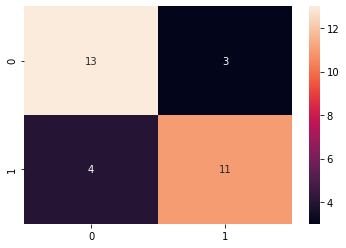

In [13]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

from sklearn.metrics import classification_report, confusion_matrix

# y_predict_train = decision_tree.predict(X_train)
# y_predict_train
# cm = confusion_matrix(y_train, y_predict_train)
# sns.heatmap(cm, annot=True)

y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

* Training randomforest classifier

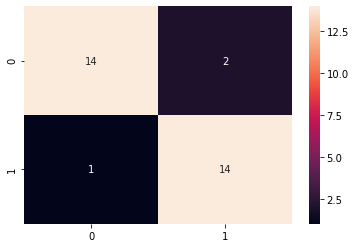

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model_master = RandomForestClassifier(n_estimators=50)
rf_model_master.fit(X_train, y_train)
y_predict_test_master = rf_model_master.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test_master)
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test, y_predict_test_master))

              precision    recall  f1-score   support

    Democrat       0.93      0.88      0.90        16
  Republican       0.88      0.93      0.90        15

    accuracy                           0.90        31
   macro avg       0.90      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



## Predicting 2020 election using 2018 census data

In [78]:
census2018 = census_data(2018)

In [79]:
vote_2018 = rf_model_master.predict(census2018[['Total_population', 'Income_median', 'Income_per_capita', 'Unemployment_rate',
               'Poverty_rate', 'Latitude', 'Longitude', 'median_male_age','median_female_age',
              'population_white_alone','population_black_alone', 'population_asian_alone',
               'population_hispanic_origin', 'population_american_indian_alone', 
               'median_house_construction_year']])

In [83]:
winner_2018 = pd.DataFrame(index=census2018.index, data = vote_2018, columns=['winner'])
electoral_votes = pd.read_csv('Resources/Electoral_votes_2020.csv')
prediction_2020 = winner_2018.merge(electoral_votes, on='State')

In [88]:
prediction_2020

,State,winner,Number of Electoral Votes
0,Alabama,Republican,9
1,Alaska,Republican,3
2,Arizona,Republican,11
3,Arkansas,Republican,6
4,California,Democrat,55
5,Colorado,Democrat,9
6,Connecticut,Democrat,7
7,Delaware,Democrat,3
8,District of Columbia,Democrat,3
9,Florida,Democrat,29


In [91]:
final_votes = prediction_2020.groupby('winner').sum()
final_votes

,Number of Electoral Votes
winner,
Democrat,308
Republican,230


In [97]:
compare = prediction_2020.merge(data_2016.winner, left_on='State', right_index=True)
compare = compare.rename(columns={
    'winner_x': 2020,
    'winner_y': 2016,
})
compare = compare.merge(data_2012.winner, left_on='State', right_index=True)
compare = compare.rename(columns={'winner':2012})
compare

,State,2020,Number of Electoral Votes,2016,2012
0,Alabama,Republican,9,Republican,Republican
1,Alaska,Republican,3,Republican,Republican
2,Arizona,Republican,11,Republican,Republican
3,Arkansas,Republican,6,Republican,Republican
4,California,Democrat,55,Democrat,Democrat
5,Colorado,Democrat,9,Democrat,Democrat
6,Connecticut,Democrat,7,Democrat,Democrat
7,Delaware,Democrat,3,Democrat,Democrat
8,District of Columbia,Democrat,3,Democrat,Democrat
9,Florida,Democrat,29,Republican,Democrat


In [ ]:
# try Choropleth Maps with go.Choropleth
# color bar coding

In [ ]:
#Ryan code ends

In [ ]:
#Connor code

In [ ]:
print("I made a change too!")

In [ ]:
#Connor code ends